# 6105 Final Project - Book Analysis

<div style="text-align: right"> Kartik Kumar (001057162),
 Meda Saikanth Reddy (001389103)
</div>



# So the book that we chose to present on is ***SHAWSHANK REDEMPTION*** 

### Has anyone read the book?
<br />
<center>
<img src =NEU/ipynb.images/shawshank-2.jpg width = 600 />
</center>


### We hadn't read the book... but we saw the movie with Tom Robbins as Andy and Morgan Freeman as Ellis Boyd

<br />
<center>
<img src =NEU/ipynb.images/shawshank-1.jpg width = 600 />
</center>

## So what is the book about?


### Andy Dufresne (Tim Robbins) is sentenced to two consecutive life terms in prison for the murders of his wife and her lover and is sentenced to a tough prison. However, only Andy knows he didn't commit the crimes. While there, he forms a friendship with Red (Morgan Freeman), experiences brutality of prison life, adapts, helps the warden, etc., all in 19 years.

### This was us when we thought to begin some data science on the book

<br />
<center>
<img src =NEU/ipynb.images/shawshank-3.jpg width = 600 />
</center>

# About the author: Stephen King

## Stephen Edwin King is an American author of horror, supernatural fiction, suspense, and fantasy novels. [More about Stephen King](https://en.wikipedia.org/wiki/Stephen_King)

### So as a part of our project we thought we should study the authors writing method and search for similarity among the books written by him. 


<br />
<center>
<img src =NEU/ipynb.images/stephenking.jpg width = 600 />
</center>

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_files = ["NEU/data/andy.txt","NEU/data/greenmile.txt","NEU/data/It.txt"]
documents = [open(f,encoding="utf8").read() for f in text_files]


vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                                   
tfidf = vect.fit_transform(documents)                                                                                                                                                                                                                       
pairwise_similarity = tfidf * tfidf.T 

In [101]:
print(pairwise_similarity.toarray())

[[1.         0.48608692 0.4564626 ]
 [0.48608692 1.         0.48672321]
 [0.4564626  0.48672321 1.        ]]


### Shawshank redemption and Greenmile are slightly more closely related as they both are based on prison life..


# Now Let's begin studying Shawshank Redemption

## 1) Basic Text Mining

In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

filename = ["NEU/data/andy.txt"]
vectorizer = CountVectorizer(max_features = 1000, ngram_range=(1, 2), stop_words='english', binary=True)
vectorizer = CountVectorizer(input='filename')      

dtm = vectorizer.fit_transform(filename)  # a sparse matrix 

In [5]:
content = open("NEU/data/andy.txt",encoding="utf8").read().replace('\n',' ')

In [3]:
len(str(content).split(" "))

42306

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

count_stopwords =  len([x for x in content.split() if x in stop])
count_stopwords

17070

In [6]:
count_digits = len([x for x in content.split() if x.isdigit()])
count_digits

55

In [7]:
count_upper = len([x for x in content.split() if x.isupper()])
count_upper

951

In [8]:
content = " ".join(x.lower() for x in content.split())
content = content.replace('[^\w\s]','')
exclude = set(",.:;'\"-?!/")
content = "".join([(ch if ch not in exclude else "") for ch in content])
content = " ".join(x for x in content.split() if x not in stop)
content

'rita hayworth shawshank redemption theres guy like every state federal prison america guessim guy get tailor made cigarettes bag reefer youre partial bottle brandy celebrate son daughters high school graduation anything else within reason wasnt always way came shawshank twenty one people happy little family willing committed murder put large insurance policy wife three years older fixed brakes chevrolet coupe father given us wedding present worked exactly planned except hadnt planned stopping pick neighbor woman neighbor woman’s infant son way castle hill town brakes let go car crashed bushes edge town common gathering speed bystanders said must fifty better hit base civil war statue burst flames also hadnt planned getting caught caught got seasons pass place maine deathpenalty district attorney saw tried three deaths given three life sentences run one fixed chance parole might long long time judge called done hideous heinous crime also past look yellowing files castle rock call big h

## 2) TextBlob can do the job!

In [9]:
from textblob import TextBlob
blob = TextBlob(content)

In [10]:
blob.sentiment

Sentiment(polarity=0.05954618065089535, subjectivity=0.47459820860588625)

In [11]:
blob.tokenize

<bound method BaseBlob.tokenize of TextBlob("rita hayworth shawshank redemption theres guy like every state federal prison america guessim guy get tailor made cigarettes bag reefer youre partial bottle brandy celebrate son daughters high school graduation anything else within reason wasnt always way came shawshank twenty one people happy little family willing committed murder put large insurance policy wife three years older fixed brakes chevrolet coupe father given us wedding present worked exactly planned except hadnt planned stopping pick neighbor woman neighbor woman’s infant son way castle hill town brakes let go car crashed bushes edge town common gathering speed bystanders said must fifty better hit base civil war statue burst flames also hadnt planned getting caught caught got seasons pass place maine deathpenalty district attorney saw tried three deaths given three life sentences run one fixed chance parole might long long time judge called done hideous heinous crime also past

In [12]:
blob.word_counts

defaultdict(int,
            {'rita': 22,
             'hayworth': 15,
             'shawshank': 43,
             'redemption': 1,
             'theres': 37,
             'guy': 42,
             'like': 163,
             'every': 40,
             'state': 22,
             'federal': 2,
             'prison': 75,
             'america': 3,
             'guessim': 1,
             'get': 145,
             'tailor': 2,
             'made': 23,
             'cigarettes': 10,
             'bag': 6,
             'reefer': 4,
             'youre': 41,
             'partial': 1,
             'bottle': 9,
             'brandy': 1,
             'celebrate': 1,
             'son': 10,
             'daughters': 1,
             'high': 12,
             'school': 8,
             'graduation': 1,
             'anything': 23,
             'else': 24,
             'within': 2,
             'reason': 9,
             'wasnt': 36,
             'always': 43,
             'way': 64,
             'came': 49,


In [13]:
blob.pos_tags

[('rita', 'JJ'),
 ('hayworth', 'NN'),
 ('shawshank', 'JJ'),
 ('redemption', 'NN'),
 ('theres', 'NNS'),
 ('guy', 'VBP'),
 ('like', 'IN'),
 ('every', 'DT'),
 ('state', 'NN'),
 ('federal', 'JJ'),
 ('prison', 'NN'),
 ('america', 'NN'),
 ('guessim', 'NN'),
 ('guy', 'NN'),
 ('get', 'VB'),
 ('tailor', 'NN'),
 ('made', 'VBN'),
 ('cigarettes', 'NNS'),
 ('bag', 'JJ'),
 ('reefer', 'VBP'),
 ('youre', 'NN'),
 ('partial', 'JJ'),
 ('bottle', 'NN'),
 ('brandy', 'JJ'),
 ('celebrate', 'NN'),
 ('son', 'NN'),
 ('daughters', 'NNS'),
 ('high', 'JJ'),
 ('school', 'NN'),
 ('graduation', 'NN'),
 ('anything', 'NN'),
 ('else', 'RB'),
 ('within', 'IN'),
 ('reason', 'NN'),
 ('wasnt', 'NN'),
 ('always', 'RB'),
 ('way', 'NN'),
 ('came', 'VBD'),
 ('shawshank', 'JJ'),
 ('twenty', 'JJ'),
 ('one', 'CD'),
 ('people', 'NNS'),
 ('happy', 'JJ'),
 ('little', 'JJ'),
 ('family', 'NN'),
 ('willing', 'JJ'),
 ('committed', 'JJ'),
 ('murder', 'NN'),
 ('put', 'VBD'),
 ('large', 'JJ'),
 ('insurance', 'NN'),
 ('policy', 'NN'),
 ('wif

In [14]:
import random
from textblob import Word
nouns = list()
for word, tag in blob.tags:
    if tag == 'NN':
        nouns.append(word.lemmatize())

print ("This text is about...")
for item in random.sample(nouns, 200):
        word = Word(item)
        print (word, end =" ")

This text is about...
lot cover death mind right id collection part trust anything diamond isnt shank son comparison word tommy color head corner doubt judge year story prisoner sensation poster ernie something kid norton prison hell department wall time interest market rockhammer cool show nedeau da roll wall normaden hell thats dufresne summer blind endless nursing hole price andy diamond name right town guy event dope marilyn balance hell guess poster tax make bitch goin lot quentin get prison cell poster sofa potato end gut kid room warden courtroom half dinner fashion face blatch tell dont company prison dug darkness couldntve end scale hayfield dark stammas mind theyll thunderbird bite life rejoice name water country life shawshankand youd humor work cell pick butt firm fromjust administration way jackrabbit suit man see wholl hand man house god deadbang matter program youve guy smile peter week look didnt prison guy time lot amount money id series idea rate vessel account jimi e

### That's not a good summary TextBlob!

<br />
<center>
<img src =NEU/ipynb.images/spirited-disappointed.png width = 600 />
</center>

## 3) WordCloud

In [15]:
!pip install wordcloud

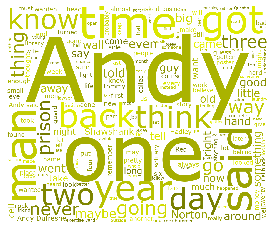

In [91]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

file_content = open("NEU/data/andy.txt",encoding="utf8").read()

wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
                            stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1200,
                            height = 1000,
                            color_func = random_color_func
                            ).generate(file_content)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 4) Translate the text

In [16]:
print(blob.translate(to='hi'))

रीता हाईवर्थ शशांक रिडेम्पशन थैरेपी हर राज्य की तरह संघीय जेल अमेरिका के अनुमान लगाने वाले को मिलता है, जो दर्जी को सिगरेट से बना बैग रेफर करता है। आंशिक बोतल ब्रांडी बेटे बेटियों को हाई स्कूल के स्नातक स्तर की पढ़ाई का जश्न मनाने का कारण बताती है। बीमा पॉलिसी पत्नी ने तीन साल पुराने तय ब्रेक शेवरलेट कूप पिता हमें दिए, जिसमें वर्तमान में शादी की योजना बनाई गई थी, सिवाय हद्द के योजनाबद्ध तरीके से काम करने के अलावा पड़ोसी महिला के शिशु के बेटे के बेटे को हिल हिल टाउन ब्रेक्स जाने दें, कार दुर्घटनाग्रस्त झाड़ियों किनारे शहर में आम सभा की गति को समझने वालों को पचास बेहतर हिट चाहिए बेस सिविल वॉर स्टैचू फटने की आग की लपटों में फंसने की योजना भी नहीं पकड़ी गई, सीजन्स पास जगह मिली, मौत की मौत के मामले में जिला वकील ने देखा कि तीन मौत की सजा दी गई है, जिसमें तीन मौत की सजा दी गई है, एक निश्चित मौका दिया जा सकता है, पैरोल लंबे समय तक जज कर सकता है, जिसे जघन्य जघन्य अपराध भी कहा जाता है। बड़ा बुलाओ सुर्खियों में रहने वाले लोगों को सजा देने की घोषणा मजाकिया अंदाज में दिखती है अगली खबर हिटलर मुसोलि

In [17]:
print(blob.translate(to='zh-TW'))

里塔·海沃斯·肖申克（Rita Hayworth Shawshank）贖回有像每個州聯邦監獄那樣的傢伙美國裁縫的傢伙得到量身定做的香煙冷藏箱白蘭地酒兒子女兒高中慶祝女兒畢業其他任何原因總是來肖申克二十一人快樂小家庭願意犯下謀殺放大保險妻子三年老固定剎車雪佛蘭轎跑車父親給我們結婚禮物確切計劃工作除非沒計劃停止挑鄰居女人鄰居女人的嬰兒兒子方式城堡小山城鎮剎車放開撞毀灌木叢邊緣城鎮共同速度速度旁觀者說必須五十更好命中基本內戰雕像爆炸火焰也沒有計劃被抓住被抓住通過季節地方緬因州死亡罰款地區檢察官看到嘗試了3次死亡，給予了3次終身監禁一次固定的機會假釋可能很久很久法官叫做可怕的令人髮指的罪行也過去泛黃文件城堡岩石叫大頭條新聞宣布定罪看起來滑稽古董下一新聞希特勒墨索里尼fdrs字母表湯機構改過自新甚至不知道單詞意味著更遠的監獄更正去認為政治家單詞可能意味著可能找到未來某些缺點教認為年輕好看貧窮側敲相當生悶堅強女孩生活過一個好房子卡賓街父親同意婚姻將採取光學公司擁有的工作方式真的發現心智保留房子拇指像不愉快的寵物相當家庭破碎可能咬足夠的仇恨最終導致原因第二次機會我肯定意味著無論如何想告訴想要告訴傢伙一位名叫安迪·杜弗雷斯（Andy dufresne）的安迪（Andy dufresne）告訴安迪（Andy）解釋事情不會花很長時間，說我的傢伙在四十年前就被該死了，這並不意味著違禁品如多餘的香煙盛放，儘管這些物品總是排在第一位。強姦小女孩博覽會唱歌數十其他獲得三件佛蒙特大理石三可愛雕塑男嬰十二有鬍子年輕人稱年齡雕塑客廳州長州長這裡名字可能記得成長北部馬薩諸塞州羅伯特阿蘭棚19951年嘗試搶劫第一商業銀行技工秋天保持變成血腥六死角兩個成員幫派三人質一人質年輕警察把頭錯了時間子彈眼睛科特尼便士自然不會去讓小幫助母親中間人用洗衣卡車能夠得到告訴鮑比必須瘋狂想要硬幣收集石頭充分盜賊笑了笑說知道保持足夠的安全，不要擔心正確的鮑比科特死了大腦腫瘤1967年硬幣收集從未轉變過香港專業教育學院的人巧克力情人節那天在聖帕迪斯周圍得到了三頓綠色的奶昔，麥當勞瘋狂地叫奧馬爾利，甚至安排午夜顯示深喉惡魔小姐瓊斯聚會二十個人資源租賃電影，儘管結束了周獨奏變色小逃避風險跑你的傢伙得到我的參考書他媽的書開玩笑的笑話新奇像手蜂鳴器瘙癢粉偶爾一次我見到內褲對內褲妻子女友猜測你會知道傢伙項目長夜時間畫像刀片不得到東西免費

## 5) Hello Gensim 

<br />
<center>
<img src =NEU/ipynb.images/spirited-hello.jpg width = 600 />
</center>

In [3]:
import logging
!pip install gensim

  Created wheel for smart-open: filename=smart_open-1.9.0-cp37-none-any.whl size=73092 sha256=59f2098d9a5e8259d83d7f5a219e9c8313fa4959fe1881eb4f80bd6d9bd1880c
  Stored in directory: C:\Users\Karti\AppData\Local\pip\Cache\wheels\ab\10\93\5cff86f5b721d77edaecc29959b1c60d894be1f66d91407d28
Successfully built smart-open


### We will use Gensim to generate a better summary than the one above.

### The original book is around but we'll try to tell you about the entire book in just 1 page! This can work as a hack for anyone who isn't into reading books but still wants to know what a book is about to impress their crush.

<br />
<center>
<img src =NEU/ipynb.images/couple.jpg width = 600 />
</center>

In [4]:
from gensim.summarization import summarize

In [20]:
chap_1 = open("NEU/data/chap1.txt",encoding="utf8").read().replace('\n',' ')
chap_2 = open("NEU/data/chap2.txt",encoding="utf8").read().replace('\n',' ')
chap_3 = open("NEU/data/chap3.txt",encoding="utf8").read().replace('\n',' ')
chap_4 = open("NEU/data/chap4.txt",encoding="utf8").read().replace('\n',' ')
chap_5 = open("NEU/data/chap5.txt",encoding="utf8").read().replace('\n',' ')
chap_6 = open("NEU/data/chap6.txt",encoding="utf8").read().replace('\n',' ')
chap_7 = open("NEU/data/chap7.txt",encoding="utf8").read().replace('\n',' ')
chap_8 = open("NEU/data/chap8.txt",encoding="utf8").read().replace('\n',' ')
chap_9 = open("NEU/data/chap9.txt",encoding="utf8").read().replace('\n',' ')
chap_10 = open("NEU/data/chap10.txt",encoding="utf8").read().replace('\n',' ')
chap_11 = open("NEU/data/chap11.txt",encoding="utf8").read().replace('\n',' ')
chap_12 = open("NEU/data/chap12.txt",encoding="utf8").read().replace('\n',' ')
chap_13 = open("NEU/data/chap13.txt",encoding="utf8").read().replace('\n',' ')
chap_14 = open("NEU/data/chap14.txt",encoding="utf8").read().replace('\n',' ')

In [22]:
print(summarize(chap_1, ratio = 0.05))

There was one fellow who was in for raping a little girl and exposing himself to dozens of others; I got him three pieces of pink Vermont marble and he  did three lovely sculptures out of them - a baby, a boy of about twelve,  and a bearded young man.
and I guess you'll know what guys in here do with such items during the long nights when time draws out like a blade.


In [25]:
print(summarize(chap_2, ratio = 0.008))

A bartender from the country club bar testified that Andy had come in around seven o'clock on the evening of September 10th, had tossed off three straight whiskeys in a twenty-minute period-when he got up from the bar-stool he told the bartender that he was going up to Glenn Quentin's house and he, the bartender, could "read about the rest of it in the papers." Another clerk, this one from  the Handy-Pik store a mile or so from Quentin's house, told the court that Dufresne had come in around quarter to nine on that same night.


In [41]:
print(summarize(chap_3, ratio = 0.02))

I remember the first time Andy Dufresne got in touch with me for something; I remember like it was yesterday.
A rock hammer looks like a miniature pickaxe-about so long." He held his hands about a foot apart, and that was when I first noticed how neatly kept his nails were.
"Eight dollars in any rock-and-gem shop," he said, "but I realize that in a business like yours you work on a cost-plus basis-"  "Cost plus ten per cent is my going rate, but I have to go up some on a  dangerous item.


In [43]:
print(summarize(chap_4, ratio = 0.02))

It comes as no surprise to most these days that there's a lot of buggery going on inside the walls-except to some of the new fish, maybe, who have the  misfortune to be young, slim, good-looking, and unwary-but homosexuality, like straight sex, comes in a hundred different shapes and forms.
I guess you done broke his nose and I think he ought to have something to pay for it."  Andy said, "Anything of yours that you stick in my mouth you're going to lose it."  Bogs looked at Andy like he was crazy, Ernie said.


In [44]:
print(summarize(chap_5, ratio = 0.07))

In the fall of 1948, Andy met me one morning in the exercise yard and asked me if I could get him half a dozen rock-blankets.
You want the big one or the little one?" At that time Rita was my best girl (a few years before it had been Betty Grable) and she came in two sizes.
A few days after Andy spoke to me, a laundry driver I did business with back then brought in better than sixty posters, most of them Rita Hayworths.


In [48]:
print(summarize(chap_6, ratio = 0.015))

Andy Dufresne had been spreading tar with a big brush less than fifteen feet away and now he tossed it into his  pail and walked over to where Mert and Hadley were sitting.
In prison every con's a low life,  and you have to get used to the idea if you intend to survive men like Hadley and  Greg Stammas, who really would kill you just as soon as look at you.
"IRS can't touch cent one." "How would you know a thing like that?"   Tim Youngblood said: "He used to be a banker, Byron.


In [51]:
print(summarize(chap_7, ratio = 0.01))

In the late spring and the summer of 1950, Andy set up two trust funds for guards who wanted to assure a college education for their kids, he advised a couple of others who wanted to take small fliers in common stock (and they did pretty damn well, as things turned out; one of them did so well he was able to take an early retirement two years later), and I'll be damned if he didn't advise the warden himself, old Lemon Lips George Dunahy, on how to go about setting up a  tax-shelter for himself.


In [52]:
print(summarize(chap_8, ratio = 0.02))

He had a Bible quote for every occasion, did Mr. Sam Norton, and whenever you meet a man like that, my best advice to you would be to grin big and cover up your balls with both hands.
Tommy thought of himself as a native of Massachusetts, but he wasn't proud; in his twenty-seven years he'd done time all over New England.
Get quick, by Jesus, you-"  "Glenn Quentin, oh my God," Tommy Williams said, and that was all he got to say because Homer Jessup, that least peaceable of men, brought his billy down behind his ear.


In [57]:
print(summarize(chap_9, ratio = 0.02))

I guess you can see why Andy went a little wonky when Tommy told him that story, and why he wanted to see the warden right away.
So Andy went to see Warden Norton on a rainy, windy day with big gray clouds scudding across the sky above the gray walls, a day when the last of the snow was starting to melt away and show lifeless patches of last year's grass in the fields beyond the prison.
He heard the warden's main door open and close and then Norton saying: "Good morning, Dufresne, how can I help you?"  "Warden," Andy began, and old Chester told us that he could hardly recognize Andy's voice it was so changed.


In [58]:
print(summarize(chap_10, ratio = 0.05))

Norton saw him near the end of June, and this conversation I heard about from  Andy himself some seven years later.
Have we got an understanding?"  "Yes," Andy said.
"But I'll be hiring a lawyer, you know." "What in God's name for?"  "I think we can put it together," Andy said.
So why?"  "Because people like you make me sick," Norton said deliberately.


In [63]:
print(summarize(chap_11, ratio = 0.012))

And that's where I want to finish out my life, Red. In a warm place that has no memory."  He had picked up a handful of pebbles as he spoke; now he tossed them, one by one, and watched them bounce and roll across the baseball diamond's dirt infield, which would be under a foot of snow before long.
"Sometimes you startle me, Red."  "What are you talking about?"  "There are really only two types of men in the world when it comes to bad trouble," Andy said, cupping a match between his hands and lighting a  cigarette.


In [76]:
print(summarize(chap_12, ratio = 0.0075))

Of course most of them were pretty slipshod affairs, the sort of thing that ends up with a  guard grabbing some poor, sidling slob's arm and growling, "Where do you think you're going, you happy asshole?"  Henley said he'd class maybe sixty of them as more serious attempts, and he included the "prison break" of 1937, the year before I arrived at The Shank.
Some clown shouting, "I want my lawyer, I want my lawyer, you guys run this place just like a  frigging prison." Burkes: "Shut up in there, or I'll rank you." The clown: "I ranked your wife, Burkie." Gonyar: "Shut up, all of you, or you'll spend the day in there."  He and Burkes went up the line again, counting noses.


In [81]:
print(summarize(chap_13, ratio = 0.010))

and before the cries have gone on  for long, the chant starts up along the cellblock: "Fresh fish, hey little fishie, fresh fish, fresh fish, got fresh fish today!"  Andy didn't flip out like that when he came to The Shank in 1948, but that's  not   to say that he didn't feel many of the same things.
But Andy only had to go through half the wall-and even with the soft concrete, it took him two rock-hammers and twenty-seven years to do it.


In [83]:
print(summarize(chap_14, ratio = 0.03))

They search outgoing parolees almost as carefully as they search incoming "new fish." And beyond containing enough dynamite to assure me of a quick turnaround and another six  or eight years inside, my "memoirs" contained something else: the name of  the town where I believe Andy Dufresne to be.
I'm ashamed to say it, but I began to think about stealing some money or shoplifting stuff from the FoodWay, anything, to get back in where it was quiet and you knew everything that was going to come up in the course of the day.
But I kept thinking of him, spending all those years chipping patiently away at the cement with his rock-hammer so he could be free.
There's a big hay field in Buxton, Andy had said, and at the north end of that hayfield there's a rock wall, right oat of a Robert Frost poem.
And when you're no longer the man who can get it for you and just an old bag-boy, it's nice to have a hobby to take your mind off your new life.


### That's about it! We've just read a 106 page book and got an idea of the events and characters and can speak to someone on the chapter wise events also! 


<br />
<center>
<img src =NEU/ipynb.images/freesolo.jpg width = 600 />
</center>


### Let's look at the chapter-wise sentiment now

In [84]:
from textblob import TextBlob
from nltk.corpus import stopwords
stop = stopwords.words('english')

def chapterwiseSentiment(filename):
    content = open(filename,encoding="utf8").read().replace('\n',' ')
    content = " ".join(x.lower() for x in content.split())
    content = content.replace('[^\w\s]','')
    exclude = set(",.:;'\"-?!/")
    content = "".join([(ch if ch not in exclude else "") for ch in content])
    content = " ".join(x for x in content.split() if x not in stop)
    content = content.replace("’s","")
    
    blob = TextBlob(content)
    print(blob.sentiment)
    return blob.sentiment

In [85]:
filenames = ["NEU/data/chap1.txt","NEU/data/chap2.txt","NEU/data/chap3.txt","NEU/data/chap4.txt","NEU/data/chap5.txt",
             "NEU/data/chap6.txt","NEU/data/chap7.txt","NEU/data/chap8.txt","NEU/data/chap9.txt","NEU/data/chap10.txt",
             "NEU/data/chap11.txt","NEU/data/chap12.txt","NEU/data/chap13.txt","NEU/data/chap14.txt"
            ]

sentimentsOfChapters = []
subjectivityOfChapters = []
for filename in filenames:
    sentimentsOfChapters.append(chapterwiseSentiment(filename).polarity)
    subjectivityOfChapters.append(chapterwiseSentiment(filename).subjectivity)

Sentiment(polarity=0.06055164319248826, subjectivity=0.47426193915630527)
Sentiment(polarity=0.06055164319248826, subjectivity=0.47426193915630527)
Sentiment(polarity=0.03592804376386466, subjectivity=0.48000357160804963)
Sentiment(polarity=0.03592804376386466, subjectivity=0.48000357160804963)
Sentiment(polarity=0.05792799614915001, subjectivity=0.4409246736169814)
Sentiment(polarity=0.05792799614915001, subjectivity=0.4409246736169814)
Sentiment(polarity=0.006775252525252536, subjectivity=0.4253811327561326)
Sentiment(polarity=0.006775252525252536, subjectivity=0.4253811327561326)
Sentiment(polarity=0.057039289824099976, subjectivity=0.43573839662447256)
Sentiment(polarity=0.057039289824099976, subjectivity=0.43573839662447256)
Sentiment(polarity=0.06735593951503044, subjectivity=0.4800943520349116)
Sentiment(polarity=0.06735593951503044, subjectivity=0.4800943520349116)
Sentiment(polarity=0.06615533582579036, subjectivity=0.4620256624688442)
Sentiment(polarity=0.06615533582579036, s

In [86]:
sentimentsOfChapters

[0.06055164319248826,
 0.03592804376386466,
 0.05792799614915001,
 0.006775252525252536,
 0.057039289824099976,
 0.06735593951503044,
 0.06615533582579036,
 0.08419960474308301,
 0.05329565013299953,
 0.004546114454651046,
 0.08194585225073027,
 0.07139600211700531,
 0.0442387823816395,
 0.07063237008089948]

In [87]:
subjectivityOfChapters

[0.47426193915630527,
 0.48000357160804963,
 0.4409246736169814,
 0.4253811327561326,
 0.43573839662447256,
 0.4800943520349116,
 0.4620256624688442,
 0.5004269884704668,
 0.4497405205236531,
 0.5433214989617428,
 0.4566997501143841,
 0.48129107917509184,
 0.5002469259135927,
 0.4835856545415367]

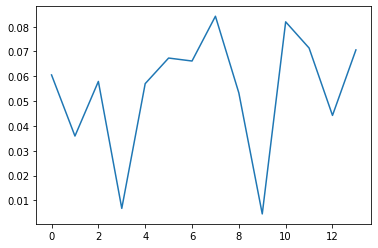

In [89]:
import matplotlib.pyplot as plt

plt.plot(sentimentsOfChapters)

### So chapter 7 and 10 are the most positive chapters in this book. And chapters 3 and 9 are the most negative. (refer to the gensim summary to cross check!)

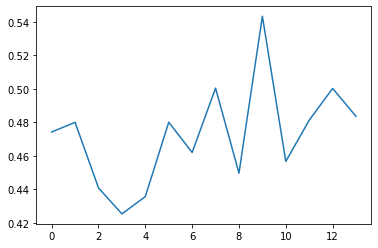

In [90]:
plt.plot(subjectivityOfChapters)

### Chapter 3 was mainly facts and Chapter 9 was mainly opinions (of Tommy, Andy and Norton)

### Character Analysis: Antagonist vs Protagonist


In [94]:
from textblob import TextBlob
from nltk.corpus import stopwords
stop = stopwords.words('english')

def cleanFile(filename):
    content = open(filename,encoding="utf8").read().replace('\n',' ')
    content = " ".join(x.lower() for x in content.split())
    content = content.replace('[^\w\s]','')
    exclude = set(",:;'\"-?!/")
    content = "".join([(ch if ch not in exclude else "") for ch in content])
    content = " ".join(x for x in content.split() if x not in stop)
    content = content.replace("’s","")
    return content

content = cleanFile("NEU/data/andy.txt")
blob = TextBlob(content)


def CharacterSentiment(charNames):
    sentimentC = 0
    count = 0
    for sentence in blob.sentences:
        for word in sentence.split(" "):
            if word in charNames:
                count += 1
                sentimentC += sentence.sentiment.polarity

    print(sentimentC/count)
    
def CharacterSubjectivity(charNames):
    sentimentC = 0
    count = 0
    for sentence in blob.sentences:
        for word in sentence.split(" "):
            if word in charNames:
                count += 1
                sentimentC += sentence.sentiment.subjectivity

    print(sentimentC/count)

In [98]:
andyName = ["andy","andy dufresne","dufresne"]
tommyName = ["tommy"]
nortonName = ["warden norton","norton","samuel norton","samuel"]
redName = ["ellis","red","ellis boyd redding","boyd"]
print("Andy")
CharacterSubjectivity(andyName)
print("Tommy")
CharacterSubjectivity(tommyName)
print("Norton")
CharacterSubjectivity(nortonName)
print("Red")
CharacterSubjectivity(redName)

Andy
0.3008607770050919
Tommy
0.3752300140936504
Norton
0.40472382555715886
Red
0.1348614576447089


## Professor and you all must be thinking this is quite normal... where's the model? There's no Data Science without a model right? So let's move on to an experiment we did with Text Modeling..

<br />
<center>
<img src =NEU/ipynb.images/shawshank-4.jpg width = 600 />
</center>

